In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import csv
from pathlib import Path
from csbdeep.utils import load_json
from stardist.plot.plot import _plot_polygon, _draw_polygons

In [2]:
results = Path('/Users/uwe/Documents/Research/MPI/starchaea/results/DRIFTCORRECTED_membrane_dna_1_crop')

In [3]:
ll {results}

total 936
-rw-r--r--  1 uwe  staff    102 Apr 17 00:00 calibration.json
-rw-r--r--  1 uwe  staff  65894 Apr 17 00:00 rois_dna.json
-rw-r--r--  1 uwe  staff  72294 Apr 17 00:00 rois_dna.zip
-rw-r--r--  1 uwe  staff  69925 Apr 17 00:00 rois_membrane.json
-rw-r--r--  1 uwe  staff  76877 Apr 17 00:00 rois_membrane.zip
-rw-r--r--  1 uwe  staff    107 Apr 17 00:00 tracks_membrane.csv


In [4]:
load_json(str(results / 'calibration.json'))

{'h': 0.12353457114973625,
 't_unit': 'sec',
 'w_unit': 'µm',
 'h_unit': 'µm',
 't': 0.0,
 'w': 0.12353457114973625}

In [5]:
rois = load_json(str(results / 'rois_membrane.json'))
rois.keys() # keys are roi names

dict_keys(['t001-00024', 't001-00025', 't001-00022', 't001-00023', 't001-00026', 't001-00027', 't004-00017', 't004-00016', 't004-00019', 't004-00018', 't004-00013', 't004-00012', 't004-00015', 't004-00014', 't004-00011', 't004-00010', 't001-00019', 't005-00003', 't005-00002', 't005-00001', 't001-00013', 't005-00007', 't001-00014', 't005-00006', 't001-00011', 't005-00005', 't001-00012', 't005-00004', 't001-00017', 't001-00018', 't001-00015', 't005-00009', 't001-00016', 't005-00008', 't002-00002', 't002-00001', 't001-00020', 't002-00004', 't004-00028', 't001-00021', 't002-00003', 't004-00027', 't002-00006', 't002-00005', 't004-00029', 't002-00008', 't004-00024', 't002-00007', 't004-00023', 't004-00026', 't002-00009', 't004-00025', 't004-00020', 't004-00022', 't004-00021', 't005-00010', 't006-00027', 't006-00028', 't001-00008', 't006-00025', 't001-00009', 't006-00026', 't005-00014', 't005-00013', 't005-00012', 't005-00011', 't001-00002', 't005-00018', 't001-00003', 't005-00017', 't006-000

In [6]:
roi = list(rois.values())[0] # grab the first roi as an example
print(roi)
roi.keys() # each roi has t and x,y coords

{'t': 1, 'x': [46.61, 46.25, 45.56, 45.56, 44.71, 44.27, 43.2, 42.45, 41.5, 40.47, 39.46, 38.28, 37.47, 36.6, 36.15, 35.8, 35.49, 35.62, 35.86, 36.35, 37.17, 38.11, 39.23, 40.37, 41.5, 42.63, 43.7, 44.77, 45.6, 46.32, 46.44, 46.69], 'y': [22.5, 23.45, 24.18, 25.22, 25.71, 26.65, 26.61, 27.29, 27.58, 27.66, 27.42, 27.31, 26.53, 25.77, 24.71, 23.63, 22.5, 21.33, 20.17, 19.06, 18.17, 17.43, 17.01, 16.8, 16.63, 16.8, 17.19, 17.6, 18.4, 19.28, 20.45, 21.47]}


dict_keys(['t', 'x', 'y'])

(32, 2)

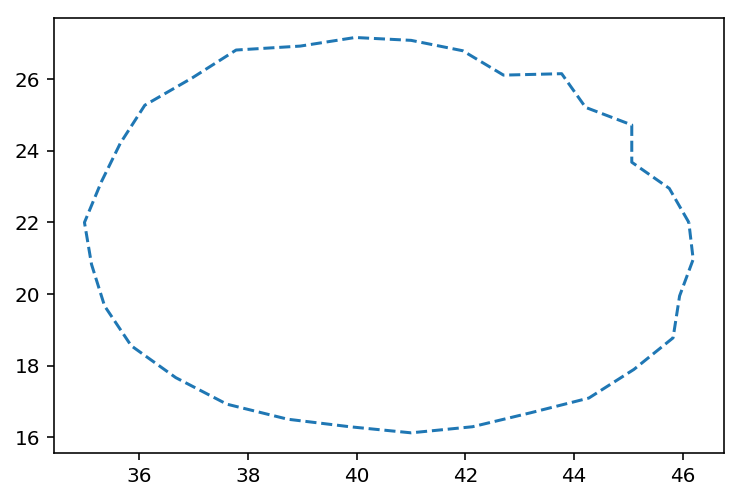

In [7]:
coord = np.stack((roi['y'],roi['x']), axis=-1)
coord -= 0.5 # subtract 0.5 offset
_plot_polygon(coord[:,1], coord[:,0], None, None)
coord.shape

In [8]:
rois_trackmate = results / 'tracks_membrane.csv'

In [9]:
# just a single track in this example

In [10]:
!cat {rois_trackmate}

t001-00019, t002-00022, t003-00013, t004-00016, t004-00009, t005-00014, t005-00023, t006-00021, t006-00023


In [11]:
tracks = []
with open(str(rois_trackmate)) as _f:
    csv_reader = csv.reader(_f, delimiter=',')
    for row in csv_reader:
        tracks.append(tuple(r.strip() for r in row))
print(f"Found {len(tracks)} tracks in dataset!")

Found 1 tracks in dataset!


In [12]:
# tracks is now a list of tuples that are the roi names / keys for the loaded rois form the csv above
tracks

[('t001-00019',
  't002-00022',
  't003-00013',
  't004-00016',
  't004-00009',
  't005-00014',
  't005-00023',
  't006-00021',
  't006-00023')]